In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\user\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install python-mnist

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\user\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [113]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.neighbors import NearestCentroid
#from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [6]:
data= loadmat('/Users/User/Desktop/UNI/Optmizzation/Assignment/MNIST/MNIST_all.mat')

In [7]:
print (data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov  2 22:15:01 2021', '__version__': '1.0', '__globals__': [], 'test_images': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'test_labels': array([[7],
       [2],
       [1],
       ...,
       [4],
       [5],
       [6]], dtype=uint8), 'train_images': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'train_labels': array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)}


In [35]:
train_images = data['train_images']
y_train = data['train_labels'].flatten()
test_images = data['test_images']
y_test = data['test_labels'].flatten()

In [36]:
x_train = train_images.T.reshape(60000,28*28)
x_test = test_images.T.reshape(10000,28*28)

In [37]:
X = np.concatenate((x_train, x_test))
Y = np.concatenate((y_train, y_test))

In [38]:
#Standardizing the feature
X_train = StandardScaler().fit_transform(x_train)
X_test = StandardScaler().fit_transform(x_test)

In [39]:
pca = PCA(n_components=2)
XPCA_train = pca.fit_transform(X_train)
XPCA_trainPD = pd.DataFrame(data = XPCA_train)

In [40]:
pca = PCA(n_components=2)
XPCA_test = pca.fit_transform(X_test)
XPCA_testPD = pd.DataFrame(data = XPCA_test)

In [92]:
print('original data shape',X_train.shape)
print('reduced data shape',XPCA_train.shape)
print('Label train',y_train.shape)
print('Label test',y_test.shape)

original data shape (60000, 784)
reduced data shape (60000, 2)
Label train (60000,)
Label test (10000,)


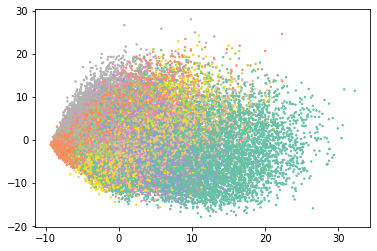

In [15]:
Set = sns.color_palette("Set2", 30)
color_mapping = {key:value for (key,value) in enumerate(Set)}
colors = list(map(lambda x: color_mapping[x], y_train))
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(XPCA_train[:, 0], XPCA_train[:, 1], c=colors, s= 2)

In [140]:
NC=NearestCentroid()
print(NC.fit(XPCA_train,y_train))
#print(knn.score(X_train,y_train))
y_pred=NC.predict(XPCA_test)
acc_NC=metrics.accuracy_score(y_test,y_pred)
print("Testing accuracy of Nearest Centroid model is ",acc_NC)

NearestCentroid()
Testing accuracy of Nearest Centroid model is  0.3485


In [141]:
print("Performance Measure of knn model:\n\n",metrics.classification_report(y_test, y_pred))

Performance Measure of knn model:

               precision    recall  f1-score   support

           0       0.52      0.72      0.60       980
           1       0.58      0.96      0.72      1135
           2       0.15      0.11      0.13      1032
           3       0.13      0.03      0.05      1010
           4       0.35      0.22      0.27       982
           5       0.18      0.16      0.17       892
           6       0.15      0.11      0.13       958
           7       0.38      0.71      0.49      1028
           8       0.23      0.31      0.27       974
           9       0.13      0.05      0.07      1009

    accuracy                           0.35     10000
   macro avg       0.28      0.34      0.29     10000
weighted avg       0.28      0.35      0.30     10000



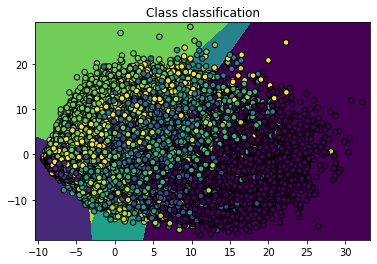

In [143]:
from matplotlib.colors import ListedColormap
h = 0.02
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = XPCA_train[:, 0].min() - 1, XPCA_train[:, 0].max() + 1
y_min, y_max = XPCA_train[:, 1].min() - 1, XPCA_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = NC.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, shading='auto')

# Plot also the training points
plt.scatter(XPCA_train[:, 0], XPCA_train[:, 1], c=y_train, edgecolor="k", s=30)
plt.title("Class classification")
plt.axis("tight")

plt.show()

In [183]:
#XPCA_trainPD = pd.DataFrame(data = XPCA_train)
y_trainPD = pd.DataFrame(y_train, columns = ['Label'])
XY = pd.concat([XPCA_trainPD, y_trainPD], axis = 1)
print (XY)
XPCA_train235 = XY.loc[(XY['Label'] == 2) | (XY['Label']== 3) | (XY['Label']== 5)]
print (XPCA_train235)
YPCA_train235= XPCA_train235 ['Label']
print (YPCA_train235)
del XPCA_train235 ['Label']
print (XPCA_train235)

              0         1  Label
0     -0.922303 -4.813889      5
1      8.709066 -7.755207      0
2      2.328390  9.432161      4
3     -6.582098 -3.746671      1
4     -5.183218  3.133027      9
...         ...       ...    ...
59995 -2.039375 -5.118059      8
59996  0.607854 -6.498618      3
59997 -3.777326 -3.229283      5
59998  1.722395 -4.948946      6
59999 -1.427259 -6.174536      8

[60000 rows x 3 columns]
              0          1  Label
0     -0.922303  -4.813889      5
5      2.198399  -3.068537      2
7      1.926888  -5.406084      3
10    -3.147600  -2.348500      3
11    -4.062270  -4.240864      5
...         ...        ...    ...
59985  8.895987 -12.718907      2
59991  2.389887  -9.533682      2
59993 -3.108625  -3.785002      5
59996  0.607854  -6.498618      3
59997 -3.777326  -3.229283      5

[17510 rows x 3 columns]
0        5
5        2
7        3
10       3
11       5
        ..
59985    2
59991    2
59993    5
59996    3
59997    5
Name: Label, Length: 17

In [190]:
y_testPD = pd.DataFrame(y_test, columns = ['Label'])
XY = pd.concat([XPCA_testPD, y_testPD], axis = 1)
print (XY)
XPCA_test235 = XY.loc[(XY['Label'] == 2) | (XY['Label']== 3) | (XY['Label']== 5)]
print (XPCA_test235)
YPCA_test235= XPCA_test235 ['Label']
print (YPCA_test235)
del XPCA_test235 ['Label']
print (XPCA_test235)

              0         1  Label
0     -5.458286  6.414081      7
1      2.804500 -8.030192      2
2     -7.411238 -3.862916      1
3      8.751282  0.047258      0
4     -0.065740  6.295972      4
...         ...       ...    ...
9995   3.579518 -3.368819      2
9996   3.244800 -1.982501      3
9997  -5.004383  1.155376      4
9998  -1.420924 -4.425367      5
9999  13.142770 -4.261669      6

[10000 rows x 3 columns]
             0         1  Label
1     2.804500 -8.030192      2
8     4.061962  1.128642      5
15    2.235932 -0.804223      5
18    5.301831  4.250419      3
23   -2.561196 -3.982030      5
...        ...       ...    ...
9986 -2.610680  0.755088      3
9988 -0.527158 -4.583762      5
9995  3.579518 -3.368819      2
9996  3.244800 -1.982501      3
9998 -1.420924 -4.425367      5

[2934 rows x 3 columns]
1       2
8       5
15      5
18      3
23      5
       ..
9986    3
9988    5
9995    2
9996    3
9998    5
Name: Label, Length: 2934, dtype: uint8
             0     

In [191]:
NC=NearestCentroid()
print(NC.fit(XPCA_train235,YPCA_train235))
#print(knn.score(X_train,y_train))
y_pred=NC.predict(XPCA_test235)
acc_NC=metrics.accuracy_score(YPCA_test235,y_pred)
print("Testing accuracy of Nearest Centroid model is ",acc_NC)

NearestCentroid()
Testing accuracy of Nearest Centroid model is  0.396387184730743


In [193]:
print("Performance Measure of knn model:\n\n",metrics.classification_report(YPCA_test235, y_pred, zero_division= 1))

Performance Measure of knn model:

               precision    recall  f1-score   support

           2       0.56      0.45      0.50      1032
           3       0.40      0.21      0.28      1010
           5       0.31      0.54      0.39       892

    accuracy                           0.40      2934
   macro avg       0.42      0.40      0.39      2934
weighted avg       0.43      0.40      0.39      2934



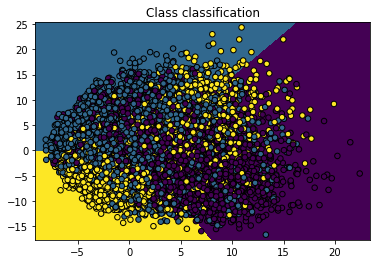

In [194]:
h = 0.02
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = XPCA_train235.iloc[:, 0].min() - 1, XPCA_train235.iloc[:, 0].max() + 1
y_min, y_max = XPCA_train235.iloc[:, 1].min() - 1, XPCA_train235.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = NC.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, shading='auto')

# Plot also the training points
plt.scatter(XPCA_train235.iloc[:, 0], XPCA_train235.iloc[:, 1], c=YPCA_train235, edgecolor="k", s=30)
plt.title("Class classification")
plt.axis("tight")

plt.show()

In [136]:
n_neighbors = 50
KNC= neighbors.KNeighborsClassifier(n_neighbors, weights= 'uniform')
print(KNC.fit(XPCA_train,y_train))
#print(knn.score(X_train,y_train))
y_pred=KNC.predict(XPCA_test)
acc_knc=metrics.accuracy_score(y_test,y_pred)
print("Testing accuracy of knn model is ",acc_knc)

KNeighborsClassifier(n_neighbors=50)
Testing accuracy of knn model is  0.3626


In [137]:
print("Performance Measure of knn model:\n\n",metrics.classification_report(y_test, y_pred))

Performance Measure of knn model:

               precision    recall  f1-score   support

           0       0.55      0.68      0.61       980
           1       0.82      0.89      0.85      1135
           2       0.22      0.33      0.26      1032
           3       0.14      0.09      0.11      1010
           4       0.25      0.16      0.19       982
           5       0.19      0.18      0.18       892
           6       0.19      0.24      0.21       958
           7       0.45      0.60      0.51      1028
           8       0.22      0.10      0.14       974
           9       0.33      0.26      0.29      1009

    accuracy                           0.36     10000
   macro avg       0.33      0.35      0.34     10000
weighted avg       0.34      0.36      0.34     10000



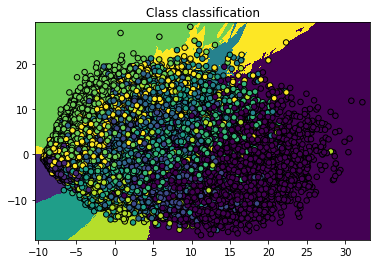

In [138]:
h = 0.02
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = XPCA_train[:, 0].min() - 1, XPCA_train[:, 0].max() + 1
y_min, y_max = XPCA_train[:, 1].min() - 1, XPCA_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = KNC.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, shading='auto')

# Plot also the training points
plt.scatter(XPCA_train[:, 0], XPCA_train[:, 1], c=y_train, edgecolor="k", s=30)
plt.title("Class classification")
plt.axis("tight")

plt.show()

In [89]:
clf = SGDClassifier(loss="hinge", eta0=0.0001, learning_rate="constant")
clf.fit(XPCA_train, y_train)
clf.score(XPCA_train, y_train)
y_pred=clf.predict(XPCA_test)
acc_clf=metrics.accuracy_score(y_test,y_pred)
print("Testing accuracy of Perceptron with Backpropagation model is ",acc_clf)

Testing accuracy of Perceptron with Backpropagation model is  0.3062


In [90]:
print("Performance Measure of Perceptron with Backpropagation model:\n\n",metrics.classification_report(y_test, y_pred, zero_division= 1))

Performance Measure of Perceptron with Backpropagation model:

               precision    recall  f1-score   support

           0       0.42      0.81      0.56       980
           1       0.60      0.96      0.74      1135
           2       1.00      0.00      0.00      1032
           3       0.07      0.17      0.10      1010
           4       0.23      0.12      0.16       982
           5       0.20      0.14      0.16       892
           6       0.14      0.15      0.15       958
           7       0.75      0.29      0.42      1028
           8       0.25      0.32      0.28       974
           9       1.00      0.00      0.00      1009

    accuracy                           0.31     10000
   macro avg       0.47      0.30      0.26     10000
weighted avg       0.48      0.31      0.26     10000



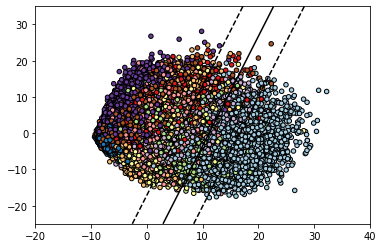

In [93]:
xx = np.linspace(-20, 40, 10)
yy = np.linspace(-25, 35, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]]).flatten()
    Z[i, j] = p[0]
levels = [-1, 0.0, 1]
linestyles = ["dashed", "solid", "dashed"]
colors = "k"
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(XPCA_train[:, 0], XPCA_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor="black", s=20)

plt.axis("tight")
plt.show()

In [107]:
clf = SGDClassifier(loss="squared_loss", eta0=0.0001, learning_rate="constant")
clf.fit(XPCA_train, y_train)
clf.score(XPCA_train, y_train)
y_pred=clf.predict(XPCA_test)
acc_clf=metrics.accuracy_score(y_test,y_pred)
print("Testing accuracy of Perceptron with MSE model is ",acc_clf)

Testing accuracy of Perceptron with MSE model is  0.2812


In [108]:
print("Performance Measure of Perceptron with MSE model:\n\n",metrics.classification_report(y_test, y_pred, zero_division= 1))

Performance Measure of Perceptron with MSE model:

               precision    recall  f1-score   support

           0       0.27      0.97      0.42       980
           1       0.29      1.00      0.45      1135
           2       1.00      0.00      0.00      1032
           3       1.00      0.00      0.00      1010
           4       1.00      0.00      0.00       982
           5       1.00      0.00      0.00       892
           6       1.00      0.00      0.00       958
           7       0.29      0.70      0.41      1028
           8       1.00      0.00      0.00       974
           9       0.13      0.01      0.01      1009

    accuracy                           0.28     10000
   macro avg       0.70      0.27      0.13     10000
weighted avg       0.69      0.28      0.14     10000



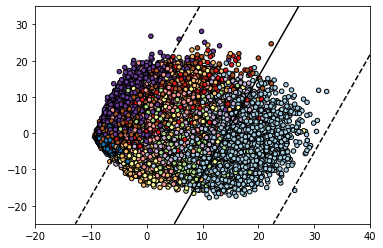

In [109]:
xx = np.linspace(-20, 40, 10)
yy = np.linspace(-25, 35, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]]).flatten()
    Z[i, j] = p[0]
levels = [-1, 0.0, 1]
linestyles = ["dashed", "solid", "dashed"]
colors = "k"
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(XPCA_train[:, 0], XPCA_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor="black", s=20)

plt.axis("tight")
plt.show()

print ("DF: ", XPCA_train.shape)
print ("DF: ", X_train.shape)
print("DF: ", y_train.shape)
print(type(XPCA_train))
print(type(X_train))
print(type(y_train))
print (XPCA_train)
print (X_train)
print (y_train)

# network and training
EPOCHS = 50
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 16   # number of outputs = number of digits
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES, input_shape=(2,), kernel_initializer='glorot_uniform', name='dense_layer', activation='hard_sigmoid'))

# summary of the model
model.summary()

# compiling the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#training the moodel
model.fit(XCPA_train, y_train,batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

#evalute the model
test_loss, test_acc = model.evaluate(XCPA_test, y_test)
print('Test accuracy:', test_acc)

# making prediction
predictions = model.predict(XCPA_test)

# summary of the model
model.summary()

# compiling the model
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['accuracy'])

#training the moodel
model.fit(XCPA_train, y_train,batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

#evalute the model
test_loss, test_acc = model.evaluate(XCPA_test, y_test)
print('Test accuracy:', test_acc)

# making prediction
predictions = model.predict(XCPA_test)